### BITI 3413 Natural Language Processing

### PAVEETHERAN A/L THINAGARAN

#### --------------------------------------------------------------------

# Required Library

In [1]:
import codecs
import nltk
import re
from nltk.tokenize.toktok import ToktokTokenizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from contractions import CONTRACTION_MAP
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from nltk.tokenize import word_tokenize,sent_tokenize

pd.options.display.max_colwidth = 200
%matplotlib inline

# Load My Metaverse corpus

In [2]:
# Fetching text and transform into lowercase 
text1 = codecs.open("metaverse_corpus/text1.txt", 'r', "utf-8")
text1 = text1.read().lower()

text2 = codecs.open("metaverse_corpus/text2.txt", 'r', "utf-8")
text2 = text2.read().lower()

text3 = codecs.open("metaverse_corpus/text3.txt", 'r', "utf-8")
text3 = text3.read().lower()

text4 = codecs.open("metaverse_corpus/text4.txt", 'r', "utf-8")
text4 = text4.read().lower()

text5 = codecs.open("metaverse_corpus/text5.txt", 'r', "utf-8")
text5 = text5.read().lower()

# Initialize text in list form
metaverse_corpus = [text1,text2,text3,text4,text5]

# Text Pre-Processing
## Expand Contractions

In [3]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    try:
        expanded_text = contractions_pattern.sub(expand_match, text)
        expanded_text = re.sub("'", "", expanded_text)
    except:
        return text
    return expanded_text

## Remove Special Characters

In [4]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, ' ', text)
    return text

## Remove Stopwords

In [5]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

### Implement Text Pre-Processing

In [6]:
# Expanding word in every corpus on the list which just generated
# Ex : Don't -> Do not 
expand_contraction = [expand_contractions(my_metaverse) 
                      for my_metaverse in metaverse_corpus]

In [7]:
# Removing unwanted symnbol occur in every corpus on the list which just generated
# Ex : #Metaverse -> Metaverse
remove_special_characters = [remove_special_characters(my_metaverse, remove_digits=True)
                             for my_metaverse in expand_contraction]

In [8]:
# Removing stopword occur in every corpus on the list which just generated
# Ex : "the"
remove_stopwords = [remove_stopwords(my_metaverse, is_lower_case=False) 
                    for my_metaverse in remove_special_characters]

# Initialize cleaned metaverse corpus which undergo text pre-processing such as
# convert lowercase, expand contraction, remove special character and remove stopword
cleaned_my_metaversa_corpus = remove_stopwords

In [9]:
# Combine every corpus which exists in the list into one full text.
# The purpose is to make easier on the " Visualize the frequent words using WordCloud" task
# which to minimize repetition in this task.
full_text = ""
for display_text in cleaned_my_metaversa_corpus:
    print("---------------------------------------------")
    print(display_text)
    full_text = full_text + display_text
    print("---------------------------------------------")

---------------------------------------------
june came end facebook ceo mark zuckerberg told employees ambitious new initiative future company would go far beyond current project building set connected social apps hardware support instead said facebook would strive build maximalist interconnected set experiences straight sci fi world known metaverse company divisions focused products communities creators commerce virtual reality would increasingly work realize vision said remote address employees think interesting themes come together bigger idea zuckerberg said overarching goal across initiatives help bring metaverse life metaverse moment coined snow crash neal stephenson sci fi novel term refers convergence physical augmented virtual reality shared online space earlier month new york times explored companies products including epic games fortnite roblox even animal crossing new horizons increasingly metaverse like elements epic games ceo tim sweeney discussing desire contribute meta

# Visualize the frequent words using WordCloud

In [10]:
# Fetching collection of stopwords form wordcloud library
# The purpse is for double confirmation and remove miss stopwords during text pre-processing 
stopwords = STOPWORDS

# Initialize the parameter which involve in the wordcloud output
wc = WordCloud(background_color="white",stopwords=stopwords,height=1000,width=1000)

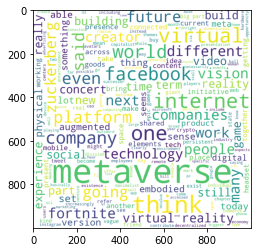

In [11]:
# Using "full_text" variable which is concatenation of every corpus
# to generate the output the wordcloud.
# The purpose to using wordcloud is to easier analysis the most frequent word by 
# generating easy visualization. 
# The bigger the word, the higher the frequency.
plt.imshow(wc.generate(full_text))
plt.show()

# Saving the generated image into current directory
wc.to_file("saveMe.png")

## Represent the top 20 most frequent unigram, bigram and trigrams

In [12]:
# The purpose of this function is to filter the top 20 high frequency phrase such as 
# unigram, bigram, trigram
def top_20(features):
    rows = features
    cols = features[0]
    count_col = 0
    count_row = 0
    total_quantity_per_row = 0
    my_list = {}
    total_quantity_per_row_list = []
        
    for col in cols:
        for row in rows:

            total_quantity_per_row = total_quantity_per_row + features[count_row][count_col]
            count_row = count_row + 1
        my_list["Vocab"] = vocab[count_col]
        my_list["Freq"] = total_quantity_per_row
        total_quantity_per_row_list.append(my_list.copy())
        total_quantity_per_row = 0
        count_col = count_col + 1
        count_row = 0

    desc_order = sorted(total_quantity_per_row_list, key=lambda d: d['Freq'], reverse=True)

    top_20_vocab = []
    top_20_freq = []
    for get_top_20 in range(0,20):
        top_20_vocab.append(desc_order[get_top_20]["Vocab"])
        top_20_freq.append(desc_order[get_top_20]["Freq"])

    return (top_20_freq,top_20_vocab)

### Unigram

In [13]:
# Generating Unigram and calculate the frequency in every corpus
# The purpose of using "min_df=3" is to make an availability in each every corpus
# where its refer at least 3 corpus need the same phrase.
vectorizer = CountVectorizer(min_df=3, ngram_range=(1,1))
features = vectorizer.fit_transform(cleaned_my_metaversa_corpus)

features = features.toarray()
vocab = vectorizer.get_feature_names_out()
bow = pd.DataFrame(features, columns=vocab)
bow

,able,across,also,augmented,building,companies,company,could,different,digital,...,still,tech,technology,term,think,virtual,work,working,world,would
0,1,1,0,1,1,1,6,3,1,0,...,1,1,0,1,1,5,3,1,1,7
1,1,1,3,1,2,2,1,1,4,1,...,0,0,2,0,15,3,0,1,0,1
2,0,0,1,0,0,1,0,0,0,1,...,1,1,0,1,0,1,1,0,1,0
3,2,1,1,1,2,2,2,4,0,2,...,3,1,3,3,1,9,2,1,5,2
4,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [14]:
# Generating the top 20 higher frequency in Unigram
get_freq, get_vocab = top_20(features)
pd.DataFrame(get_freq,get_vocab)

,0
metaverse,43
virtual,19
think,17
like,16
internet,13
one,13
reality,11
facebook,10
would,10
company,9


In [15]:
# Generating Bigram and calculate the frequency in every corpus
# The purpose of using "min_df=2" is to make an availability in each every corpus
# where its refer at least 2 corpus need the same phrase. 
vectorizer = CountVectorizer(min_df=2, ngram_range=(2,2))
features = vectorizer.fit_transform(cleaned_my_metaversa_corpus)

features = features.toarray()
vocab = vectorizer.get_feature_names_out()
bow = pd.DataFrame(features, columns=vocab)
bow

,augmented reality,capitalist matthew,embodied internet,epic games,game consoles,many different,mark zuckerberg,matthew ball,metaverse company,metaverse embodied,...,social platforms,still getting,tech giants,two dimensional,venture capitalist,virtual augmented,virtual reality,virtual world,virtual worlds,vr ar
0,0,1,2,2,0,1,1,1,1,1,...,1,1,0,1,1,0,3,0,1,0
1,1,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,1,2,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,0,1,1,0,0,0,2,0,...,0,1,1,0,0,0,1,2,1,1
4,1,1,0,0,0,1,1,1,0,0,...,0,0,0,1,1,1,0,0,0,0


In [16]:
# Generating the top 20 higher frequency in Bigram
get_freq, get_vocab = top_20(features)
pd.DataFrame(get_freq,get_vocab)

,0
virtual reality,6
augmented reality,3
embodied internet,3
epic games,3
metaverse company,3
virtual world,3
capitalist matthew,2
game consoles,2
many different,2
mark zuckerberg,2


In [17]:
# Generating Trigram and calculate the frequency in every corpus
# The purpose of using "min_df=1" is to make an availability in each every corpus
# where its refer at least 1 corpus need the same phrase.
vectorizer = CountVectorizer(min_df=1, ngram_range=(3,3))
features = vectorizer.fit_transform(cleaned_my_metaversa_corpus)

features = features.toarray()
vocab = vectorizer.get_feature_names_out()
bow = pd.DataFrame(features, columns=vocab)
bow

,ability make future,able hear concert,able jump experience,able make eye,able take avatars,accessed pcs game,accessed via vr,accessible across different,according crypto giant,according elon musk,...,yes saying fortnite,york times explored,young woman sitting,zuckerberg announced intention,zuckerberg describes metaverse,zuckerberg presentation could,zuckerberg said metaverse,zuckerberg said operated,zuckerberg said overarching,zuckerberg told employees
0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,1
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
# Generating the top 20 higher frequency in Trigram
get_freq, get_vocab = top_20(features)
pd.DataFrame(get_freq,get_vocab)

,0
big part next,2
buy sell goods,2
capitalist matthew ball,2
metaverse embodied internet,2
part next chapter,2
venture capitalist matthew,2
virtual augmented reality,2
ability make future,1
able hear concert,1
able jump experience,1


# Generate TF-IDF representation

In [19]:
# Feature Engineering: TFIDF 
# Using TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(cleaned_my_metaversa_corpus)
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [20]:
df

,ability,able,accessed,accessible,according,accurate,acquisitions,across,address,advertising,...,would,wrangling,wrapped,writing,year,years,yes,york,young,zuckerberg
0,0.047553,0.031847,0.000000,0.000000,0.000000,0.000000,0.047553,0.031847,0.047553,0.000000,...,0.222929,0.047553,0.047553,0.000000,0.000000,0.000000,0.000000,0.047553,0.000000,0.230194
1,0.000000,0.034788,0.000000,0.051945,0.000000,0.000000,0.000000,0.034788,0.000000,0.000000,...,0.034788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.154755,0.000000,0.000000,0.000000,0.000000,0.062428,...,0.000000,0.000000,0.000000,0.000000,0.077378,0.077378,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.057776,0.086269,0.000000,0.000000,0.086269,0.000000,0.028888,0.000000,0.034801,...,0.057776,0.000000,0.000000,0.000000,0.000000,0.000000,0.043135,0.000000,0.043135,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.141471,0.000000,0.000000,0.000000,0.000000,0.000000,0.114138


# Generate a word-embedding representation

In [21]:
# Tokenization every word in the corpus to undergo Word2Vec
sentences = [nltk.word_tokenize(sent) 
             for sent in nltk.sent_tokenize (str(full_text))]

model = Word2Vec(sentences, min_count=1)
print(model)

Word2Vec(vocab=642, size=100, alpha=0.025)


In [22]:
# Summarize Vocabulary
words = list(model.wv.vocab)
print(words)

['june', 'came', 'end', 'facebook', 'ceo', 'mark', 'zuckerberg', 'told', 'employees', 'ambitious', 'new', 'initiative', 'future', 'company', 'would', 'go', 'far', 'beyond', 'current', 'project', 'building', 'set', 'connected', 'social', 'apps', 'hardware', 'support', 'instead', 'said', 'strive', 'build', 'maximalist', 'interconnected', 'experiences', 'straight', 'sci', 'fi', 'world', 'known', 'metaverse', 'divisions', 'focused', 'products', 'communities', 'creators', 'commerce', 'virtual', 'reality', 'increasingly', 'work', 'realize', 'vision', 'remote', 'address', 'think', 'interesting', 'themes', 'come', 'together', 'bigger', 'idea', 'overarching', 'goal', 'across', 'initiatives', 'help', 'bring', 'life', 'moment', 'coined', 'snow', 'crash', 'neal', 'stephenson', 'novel', 'term', 'refers', 'convergence', 'physical', 'augmented', 'shared', 'online', 'space', 'earlier', 'month', 'york', 'times', 'explored', 'companies', 'including', 'epic', 'games', 'fortnite', 'roblox', 'even', 'anima

In [23]:
# Access vector for one word for analysis purpose
print(model['metaverse'])

[-4.4448706e-03 -1.6805229e-03 -2.2501561e-03  2.8491726e-03
 -2.8918200e-04  2.7193073e-03 -3.8777909e-03  8.7760988e-04
 -3.8007221e-03 -2.4016434e-03 -3.3286063e-03 -2.2486453e-03
 -4.1710017e-03  1.1043680e-03 -2.7525169e-03  3.5806468e-03
 -4.2331531e-03  1.9377170e-03 -1.1751058e-03 -2.4863831e-03
 -1.4071423e-03  7.7984034e-04  4.0339692e-03  2.5979117e-03
 -3.8547358e-03 -6.6775281e-04 -3.3387889e-03  1.0284272e-03
 -1.3644029e-03  1.9024410e-04  4.1994178e-03  4.7584288e-03
  1.9497090e-03 -2.0256776e-03  3.6175859e-03 -2.8120053e-03
 -4.0071197e-03 -4.6137599e-03  4.7904104e-03 -2.4774295e-04
 -4.7307396e-03 -1.5457845e-04  2.5345890e-03  2.9897636e-03
  2.3656820e-03  5.1037823e-03  3.3917681e-03  1.8089983e-03
  2.0264934e-03 -9.6914696e-04 -4.4581466e-03 -2.8609943e-03
  2.5752799e-03  2.3925297e-03 -9.0819679e-04  2.0998337e-03
 -3.6605042e-03 -6.1042013e-04 -3.3151389e-03 -2.9193519e-03
  2.4489963e-03  3.8808156e-03  1.8584719e-03  3.5389767e-03
 -2.9870046e-03 -4.98492

C:\Users\PAVEET~1\AppData\Local\Temp/ipykernel_20176/3387848250.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['metaverse'])


In [24]:
# Save and Load the trained Model
model.save('model.bin')
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=642, size=100, alpha=0.025)


# Visualize Word Embedding

In [25]:
X = model[model.wv.vocab]

C:\Users\PAVEET~1\AppData\Local\Temp/ipykernel_20176/3218572990.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


In [26]:
# Fit a 2D PCA Model to the Vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

C:\Users\PAVEET~1\AppData\Local\Temp/ipykernel_20176/2407526107.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


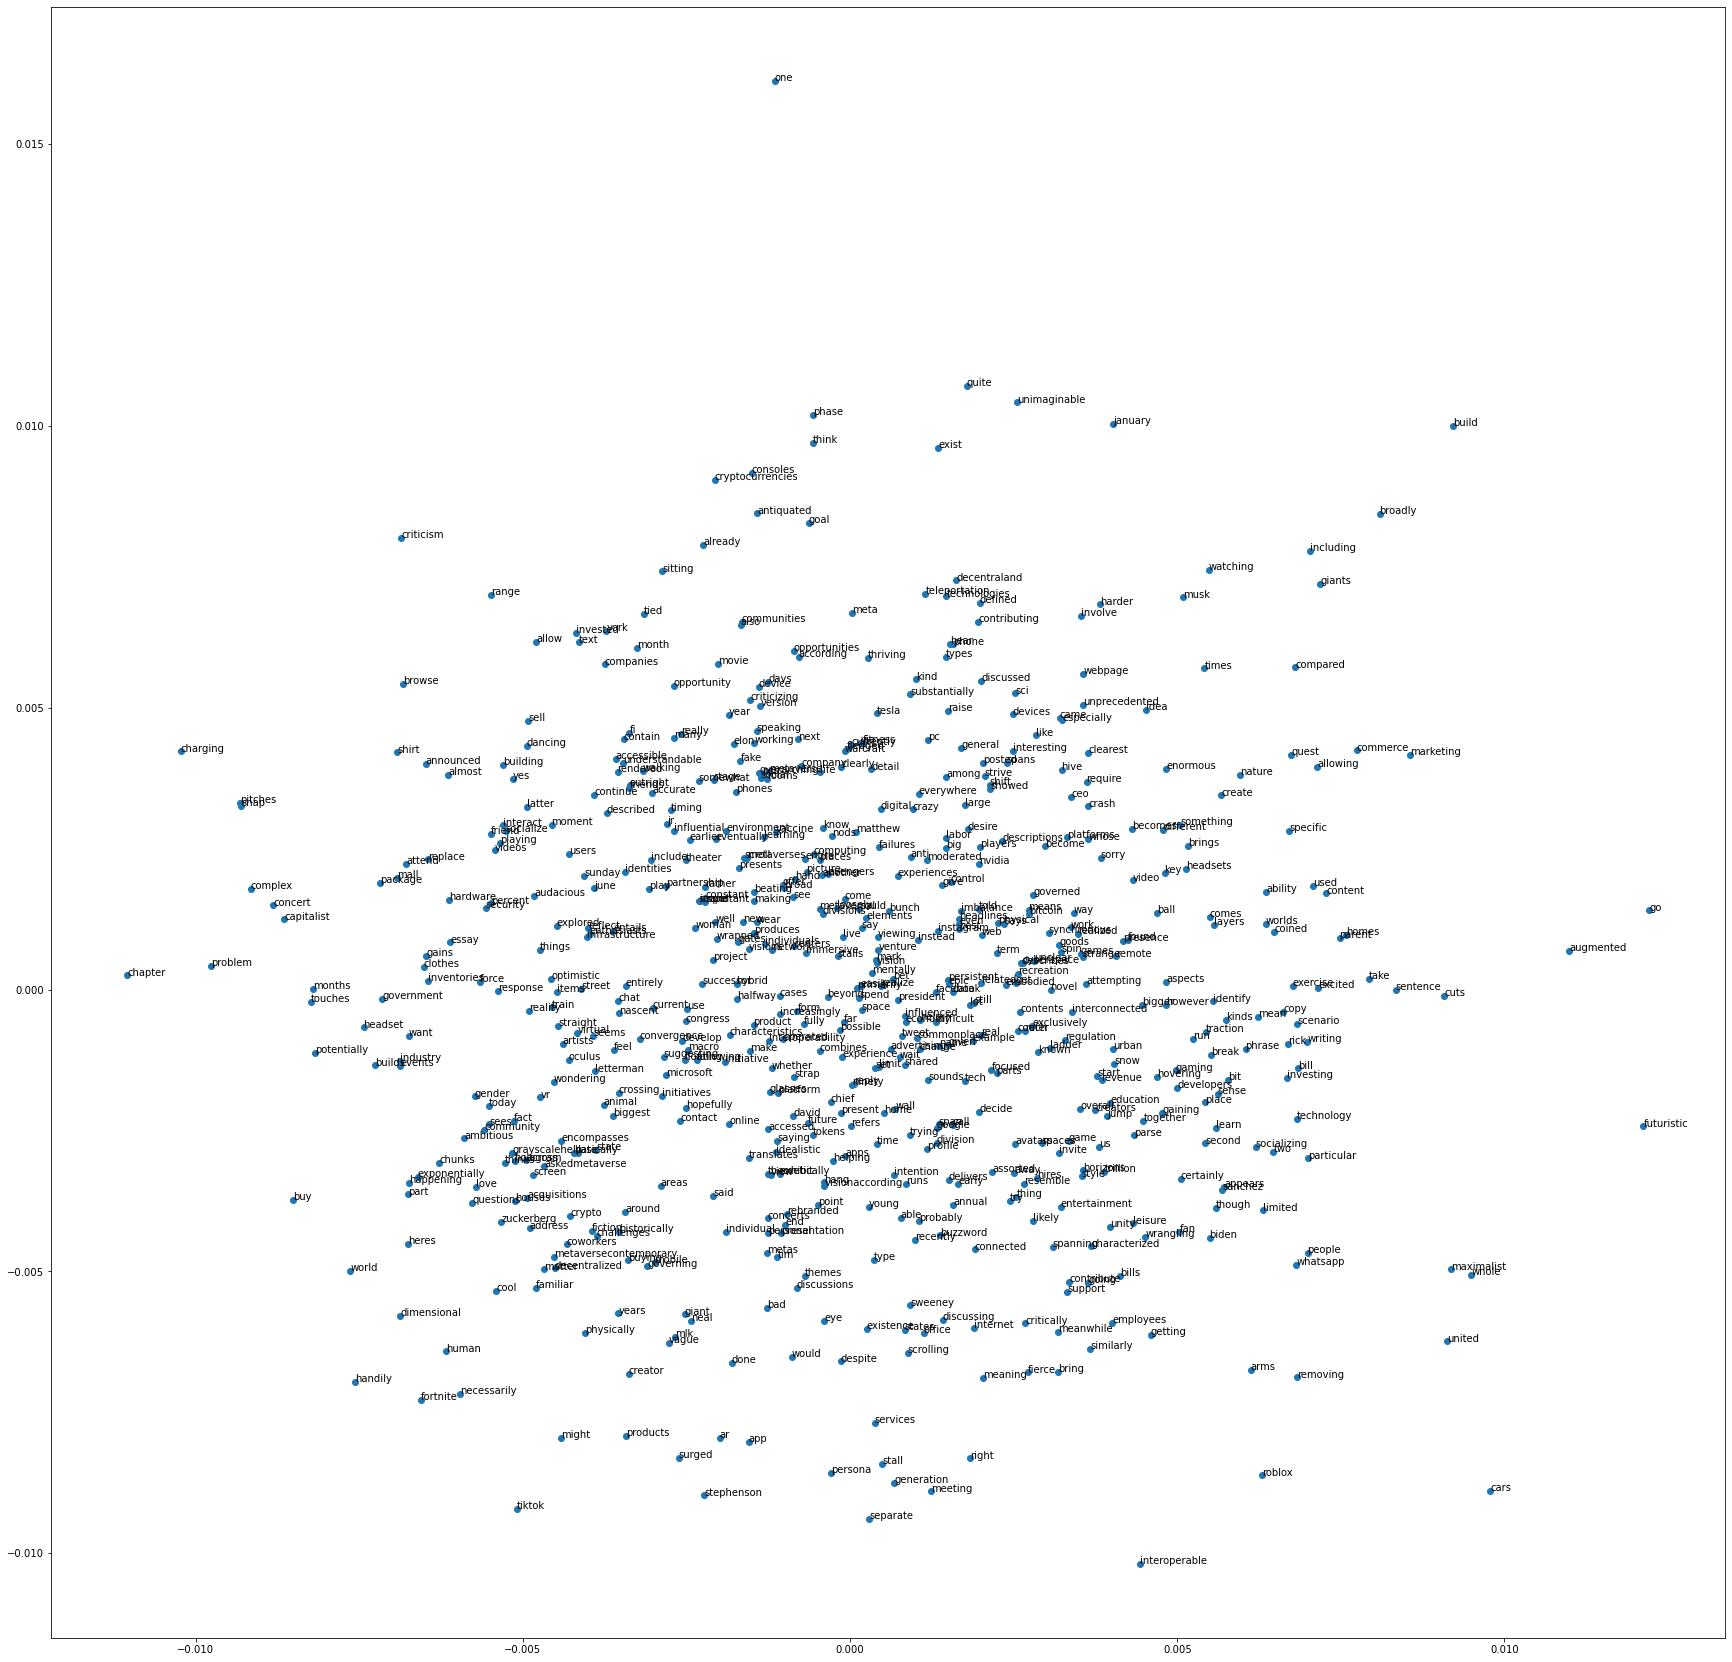

In [27]:
# Create a scatter plot of the pvisualization
pyplot.figure(figsize=(30, 30))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Apply POS tagging

In [28]:
# Tokenization every word in the corpus to undergo POS tagging
forTokenize = word_tokenize(full_text)
pd.DataFrame(forTokenize)

,0
0,june
1,came
2,end
3,facebook
4,ceo
...,...
1137,human
1138,leisure
1139,labor
1140,existence


In [29]:
# Initialize pos tagging for each token of word
postagging = nltk.pos_tag(forTokenize)
pd.DataFrame(postagging)

,0,1
0,june,NN
1,came,VBD
2,end,JJ
3,facebook,NN
4,ceo,NN
...,...,...
1137,human,JJ
1138,leisure,NN
1139,labor,NN
1140,existence,NN


In [30]:
# Fetcing all tag avaliable in this corpus
tag = []
for get_tag in postagging:
    print(get_tag[1])
    tag.append(get_tag[1])


NN
VBD
JJ
NN
NN
NN
NNP
VBD
NNS
JJ
JJ
JJ
NN
NN
MD
VB
RB
IN
JJ
NN
NN
VBN
VBN
JJ
NN
NN
NN
RB
VBD
NN
MD
VB
JJ
NN
VBD
NN
NNS
VBD
RB
JJ
NN
VBN
JJ
NN
NNS
VBD
NNS
NNS
NNS
VBP
JJ
NN
MD
RB
VB
NN
NN
VBD
JJ
NN
NNS
VBP
VBG
NNS
VBP
RB
JJR
NN
NN
VBD
JJ
NN
IN
NNS
VBP
VB
JJ
NN
FW
NN
VBD
JJ
NN
NN
NN
NN
VBP
JJ
NN
NNS
VBP
JJ
VBD
JJ
NN
VBN
JJ
NN
RBR
NN
JJ
NN
NNS
JJ
NNS
NNS
VBG
JJ
NNS
VBP
VB
RB
JJ
VBG
JJ
NNS
RB
VBP
IN
NNS
VBP
NNS
VBP
JJ
NN
VBG
NN
JJ
RB
JJ
NNS
JJ
JJ
NN
NN
NN
VBP
NN
VBN
VB
JJ
NNS
VBP
IN
JJ
JJ
JJ
NNS
VBP
RB
VBN
NN
NN
JJ
NN
NNS
JJ
VBP
NNS
NNS
CD
NN
NN
DT
NN
VBZ
JJ
NN
RB
CD
NN
VB
RB
JJ
NN
NN
VBD
JJ
JJ
JJ
NNS
VBD
NN
VBG
NNP
NN
MD
VB
JJ
NN
VBG
NN
VBD
NN
NN
JJ
NN
NN
VBG
JJ
NN
NN
NN
NN
VBZ
NN
PRP
NN
VBG
VB
JJ
NN
NN
NNS
VBG
NN
NN
MD
RB
VB
NN
NN
NN
NN
NN
NN
NN
VBP
JJ
NNS
VBP
NNS
VBN
NN
NNS
RB
VBP
NN
NNS
JJ
NNS
RB
JJ
NN
NN
NN
MD
VB
NNS
JJ
JJ
JJ
NN
VBD
NNS
MD
VBN
NN
MD
VB
NN
NN
RB
VBG
NNS
VBN
IN
CD
JJ
NN
JJ
NNS
VBG
NN
MD
RB
VB
NN
NNP
VBD
JJ
NN
JJ
NN
JJ
NNS
NNS
NNS
VBP
NN
NNS
RB
NN
JJ
NNS
NNS
VBP
NNS
NNS

In [31]:
# Group token of word based on the thier pos tagging
my_dict_1 = {}
my_list_1 = []
tem_list = []
VERIFY_TAG = list(set(tag))
x = 1

for my_tag in VERIFY_TAG:
    tem_list = []
    for word2tagGroup in set(postagging):
        if word2tagGroup[1] == my_tag:
            tem_list.append(word2tagGroup[0])
    my_dict_1[my_tag] = tem_list

In [32]:
# Output the grouped word based on thier postag
print(my_dict_1)

{'VBG': ['crossing', 'getting', 'governing', 'marketing', 'walking', 'saying', 'following', 'going', 'timing', 'building', 'including', 'happening', 'buying', 'interesting', 'gaming', 'allowing', 'floating', 'charging', 'advertising', 'scrolling', 'gaining', 'helping', 'speaking', 'according', 'visionaccording', 'socializing', 'sitting', 'trying', 'removing', 'criticizing', 'watching', 'making', 'dancing', 'viewing', 'computing', 'discussing', 'wondering', 'contributing', 'spanning', 'beating', 'meaning', 'writing', 'learning', 'working', 'attempting', 'suggesting', 'playing', 'investing', 'wrangling'], 'VB': ['go', 'know', 'stall', 'involve', 'develop', 'decide', 'think', 'love', 'force', 'harder', 'allow', 'become', 'say', 'accurate', 'bit', 'get', 'identify', 'metaversal', 'replace', 'spend', 'shared', 'strive', 'call', 'break', 'next', 'work', 'exist', 'run', 'app', 'raise', 'try', 'buy', 'refer', 'roblox', 'bring'], 'VBN': ['described', 'shared', 'limited', 'connected', 'defined',

In [33]:
# Insert the pos tag in ["  "] to view the avaliable words.
pd.DataFrame(my_dict_1["CD"])


,0
0,one
1,two
2,trillion
